Studentnummer: 500784954
Naam: Bas Levering:

# Creditcard fraud dataset.


### import libraries

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

import numpy as np
import pandas as pd
import itertools

In [21]:
read_data = pd.read_csv('../dataset/creditcard.csv')

df = pd.DataFrame(read_data)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


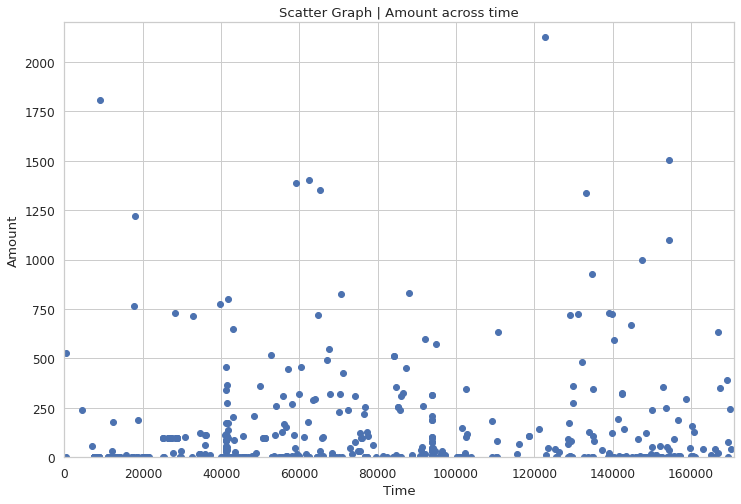

In [22]:
df_fraude = df[df['Class'] == 1]
plt.figure(figsize=(12,8))
plt.scatter(df_fraude['Time'], df_fraude['Amount'])
plt.title('Scatter Graph | Amount across time')
plt.ylabel('Amount')
plt.xlabel('Time')
plt.xlim([0,171000])
plt.ylim([0,2200])
plt.show()

In de bovenstaande Scatter Graph kunnen we goed zien hoe de datapunten verspreid zijn over de tijd.

We kunnen concluderen dat;
 * fraude zaken met een lage waarde meer voorkomen in de dataset.
 * het aantal zaken over de tijd relatief stabiel blijft.

In [23]:
big_fraud = df_fraude[df_fraude['Amount'] > 500].shape[0] # Recovery of frauds over 1000
print('Er waren {} fraude zaken met een waarde boven de 500 van de {} totale datapunten '.format(str(big_fraud), str(df_fraude.shape[0])))
print('Dat is een procentueel {:.2f}%'.format(((big_fraud / df_fraude.shape[0]) * 100)))

Er waren 35 fraude zaken met een waarde boven de 500 van de 492 totale datapunten 
Dat is een procentueel 7.11%


In [24]:
print("We kunnen zien dat er van de totale aantal datapunten in de dataset: {}, er maar {} datapunten zijn die aangemerkt zijn als fraude".format(len(df), df_fraude.shape[0]))

We kunnen zien dat er van de totale aantal datapunten in de dataset: 284807, er maar 492 datapunten zijn die aangemerkt zijn als fraude


Je kunt zien dat de dataset ongebalanseerd is. Er zijn relatief veel normale zaken en weinig fraudezaken. Als we de classifier hiermee trainen zal de uitkomst ook biased zijn.

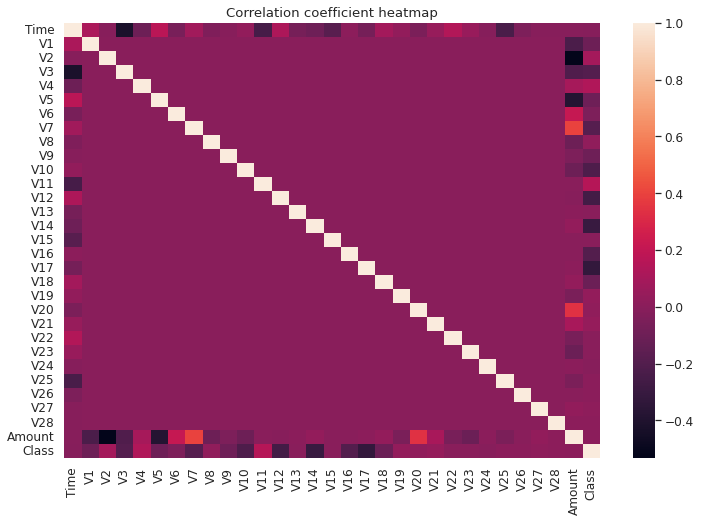

In [25]:
df_cor_coe = df.corr()

plt.figure(figsize=(12,8))

seaborn.heatmap(df_cor_coe)

seaborn.set(font_scale=1.1,style='whitegrid')

plt.title('Correlation coefficient heatmap')
plt.show()


We kunnen zien dat de meeste features niks met elkaar temaken hebben.

Gegeven bij de dataset is dat er waarschijnlijk Principal component analysis op uitgevoerd is om privacy te waarborgen of eventueel om de features te verbergen.

In [26]:
rank = df_cor_coe['Class'] # Correlation coefficient voor de feature Class

rank_df= pd.DataFrame(rank)
rank_df = np.abs(rank_df).sort_values(by='Class',ascending=False) # Rangschikken coefficient.

rank_df.dropna(inplace=True) # Drop Nan

## Data Selectie
Hier splitsen we de data in train en test set, maar omdat de data zo ongebalanseerd is gaan we undersampling toepassen.


In [27]:
df_train_complete = df[0:150000]
df_train_c1 = df_train_complete[df_train_complete['Class'] == 1]
df_train_c0 = df_train_complete[df_train_complete['Class'] == 0]

We splitsen de data vervolgens op wel en niet fraude (Class = 0, Class = 1)

In [28]:
print("In deze dataset hebben we, {} fraude datapunten en dus moeten we een gelijk aantal niet-fraude datapunten hebben".format(len(df_train_c1)))

df_sample = df_train_c0.sample(293)
df_train = df_train_c1.append(df_sample)


In deze dataset hebben we, 293 fraude datapunten en dus moeten we een gelijk aantal niet-fraude datapunten hebben


/tmp/ipykernel_33486/1998661021.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train_c1.append(df_sample)


Vervolgens pakken we een gelijk aantal non frauduleuze datapunten en plakken deze achter elkaar.

In [29]:
X_train = df_train.drop(['Class', 'Time'], axis = 1)
y_train = df_train['Class']

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

We gooien in X_train de time en class feature weg, time is niet nodig en class is ons label. Vervolgens maken we het label aan met Class.

In [30]:
df_test_comp = df[150000:]

X_test_comp = df_test_comp.drop(['Time', 'Class'],axis=1)
y_test_comp = df_test_comp['Class']
X_test_comp = np.asarray(X_test_comp)
y_test_comp = np.asarray(y_test_comp)


We doen hetzelfde voor de compelete dataset om te vergelijken met de undersampled dataset

## Confusion matrix

In [31]:
class_names=np.array(['0','1'])

### Een functie opgeven voor het plotten van een confusion matrix

In [32]:
def plot_confusion_matrix(cm, classes,title='Confusion matrix',cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [33]:
model = svm.SVC(kernel='linear')

model.fit(X_train, y_train) # Then we train our model, with our balanced data train.

SVC(kernel='linear')

We geven het type classifier op voor het model en trainen het model met de undersampled train data.

/tmp/ipykernel_33486/41814438.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


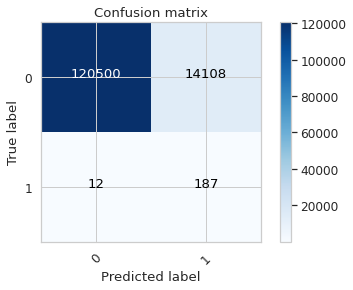

In [34]:
prediction_complete_dataset = model.predict(X_test_comp)

cmatrix= confusion_matrix(y_test_comp, prediction_complete_dataset)
plot_confusion_matrix(cmatrix,class_names)

En we gebruiken predict om de test dataset te voorspellen

In [35]:
print('Gedetecteerde fraude ' + str(cmatrix[1][1]) + ' zaken / ' + str(cmatrix[1][1]+cmatrix[1][0]) + ' totale zaken.')
print('Probability is ' + str(cmatrix[1][1]/(cmatrix[1][1]+cmatrix[1][0])))
print("Accuracy is : "+str((cmatrix[0][0]+cmatrix[1][1]) / (sum(cmatrix[0]) + sum(cmatrix[1]))))

Gedetecteerde fraude 187 zaken / 199 totale zaken.
Probability is 0.9396984924623115
Accuracy is : 0.8952576646613306
